# Analyzing Time Series 
<hr style="border:2px solid black">

## 1. Introduction 

### 1.1 Time Series Data

>- ordered sequence of observations at equal intervals of time
>- no notion of independent and dependent variables
>- observations not independent of each other
>- may exhibit a variety of patterns

### 1.2 Time Series Components

- a time series may conveniently be split into several components
- each represents an underlying pattern category

>|  components |                         pattern                                   |
 |:-----------:|:-----------------------------------------------------------------:|
 |   `Trend`   |     long-term rises and falls not having periodic pattern         |
 |`Seasonality`|recurring pattern of fixed/known period (e.g., year, quarter, week)|
 | `Remainder` |      leftover time series devoid of trend and seasonality         |

### 1.3 Decomposition Types


>|      type      |           model                 |           suitable when            |
 |:--------------:|:-------------------------------:|:----------------------------------:|
 |   `Additive`   |    $$y_t = T_t + S_t + R_t$$    | variance fairly constant over time |
 |`Multiplicative`|$$y_t = S_t\times T_t\times R_t$$|variance changes significantly over time|

#### Load Packages

In [16]:
# data analysis stack
import numpy as np
import pandas as pd
from datetime import datetime

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LinearRegression

# miscellaneous
import warnings
warnings.filterwarnings("ignore")


######################


import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# visualize the data 

In [18]:
# the txt-file contains information as seen above. therefore we skip the first 18 rows.
# more information ...
PATH = '/home/florianriemann/data_science_portfolio/boot_camp/data/data_temperature/'

df_temp = pd.read_csv(PATH + 'TG_STAID002759.txt', delimiter = ",", skiprows = 18)

In [19]:
df_temp.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [20]:
# rename the columns
df_temp.columns = ['id', 'date', 'temp', 'quality']

In [21]:
df_temp.head()

,id,date,temp,quality
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [22]:
# next change the datatype of the date and set the date as index
df_temp['date'] = df_temp['date'].astype(str)
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_temp         = df_temp.set_index("date")
df_temp.head()

,id,temp,quality
date,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0


In [23]:
# data info
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53569 entries, 1876-01-01 to 2022-08-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       53569 non-null  int64
 1   temp     53569 non-null  int64
 2   quality  53569 non-null  int64
dtypes: int64(3)
memory usage: 1.6 MB


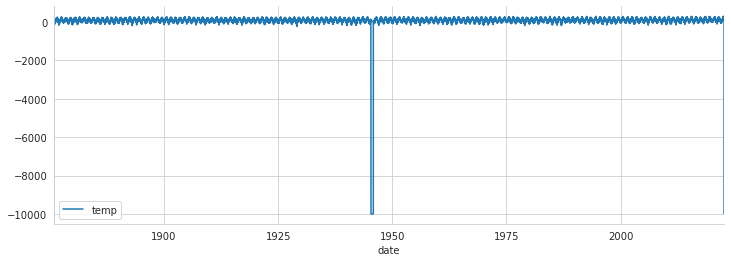

In [24]:
# ...
df_temp['temp'].plot(figsize=(12,4),legend=True)
sns.despine()

In [ ]:
Series Analysis: Milk Production Data
3.1 Train-Test Split
milk.head()
milk.tail()
temp
date	
2022-08-27	205
2022-08-28	177
2022-08-29	166
2022-08-30	172
2022-08-31	-9999
train = milk.loc['1975':'2020']
#train = milk.iloc[:-12]
train.shape
(16802, 1)
Series Analysis: Milk Production Data
3.1 Train-Test Split
milk.head()
milk.tail()
temp
date	
2022-08-27	205
2022-08-28	177
2022-08-29	166
2022-08-30	172
2022-08-31	-9999
train = milk.loc['1975':'2020']
#train = milk.iloc[:-12]
train.shape
(16802, 1)


**user defined functions**

In [3]:
def qcd_variance(series,window):
    """
    This function returns the quartile coefficient of dispersion
    of the rolling variance of a series in a given window range 
    """
    # rolling variance for a given window 
    variances = series.rolling(window).var().dropna()
    # first quartile
    Q1 = np.percentile(variances, 25, interpolation='midpoint')
    # third quartile
    Q3 = np.percentile(variances, 75, interpolation='midpoint')
    # quartile coefficient of dispersion 
    qcd = round((Q3-Q1)/(Q3+Q1),6)
    
    print(f"quartile coefficient of dispersion: {qcd}")

<hr style="border:2px solid black">

## 2. Decomposition-Type Examples

### 2.1 Additive Model

**Monthly Milk Production**

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


,date,temp
0,18760101,22
1,18760102,25
2,18760103,3
3,18760104,-58
4,18760105,-98


,temp
date,
1876-01-01,22
1876-01-02,25
1876-01-03,3
1876-01-04,-58
1876-01-05,-98


In [13]:
# data info
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53569 entries, 1876-01-01 to 2022-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    53569 non-null  int64
dtypes: int64(1)
memory usage: 837.0 KB


**data plot**

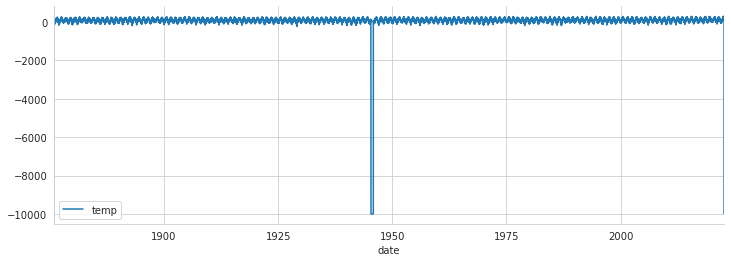

In [14]:
# ...
df_temp['temp'].plot(figsize=(12,4),legend=True)
sns.despine()

**dispersion of rolling variance**

In [15]:
# quartile coefficient of dispersion
qcd_variance(df_temp['temp'],12)

quartile coefficient of dispersion: 0.463886


### 2.2 Multiplicative Model

**Airline Flight Passengers**

In [11]:
# load data from seaborn
flights = milk

In [12]:
# check data head
flights.head()

,temp
date,
1876-01-01,22
1876-01-02,25
1876-01-03,3
1876-01-04,-58
1876-01-05,-98


In [13]:
# data info
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53569 entries, 1876-01-01 to 2022-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    53569 non-null  int64
dtypes: int64(1)
memory usage: 837.0 KB


**data plot**

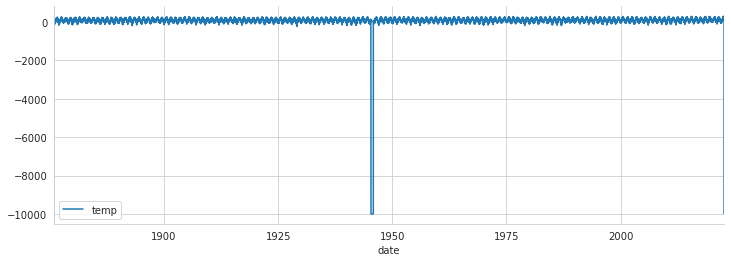

In [14]:
# alirline passenger data plot
flights['temp'].plot(figsize=(12,4),legend=True)
sns.despine()

**dispersion of rolling variance**

In [15]:
# quartile coefficient of dispersion
qcd_variance(flights['temp'],12)

quartile coefficient of dispersion: 0.463886


### 2.3 Multiplicative$\rightarrow$Additive

[**Log Transformations**](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
- `numpy.log()`: $~~~~~$works with strictly positive values
- `numpy.log1p()`: $~$works with non-negative values

[**Power Transformations**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

These are generalizations of log transformations:
- [`Box-Cox Transformation`](https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/): $~~~~~~~~~~$works with strictly positive values
- [`Yeo-Johnson Transformation`](https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/): $~~$works with positive and negative values

**Example**

In [ ]:
# log transformation
flights['transformed'] = np.log1p(flights['temp'])

flights.head()

In [ ]:
flights['transformed'].plot(figsize=(12,4),legend=True)
sns.despine()

**dispersion of rolling variance**

In [ ]:
# quartile coefficient of dispersion
qcd_variance(flights['transformed'],12)

<hr style="border:2px solid black">

### 3.2 Model Trend

In [38]:
# engineer timestep variable for future convenience

train['timestep'] = list(range(train.shape[0]))
train['t²'] = train['timestep']**2

In [39]:
# feature and target for trend model

X_trend = train[['timestep','t²']]
y_trend = train['temp']

In [40]:
trend_model = LinearRegression()

# Fit a linear function of the timestep to data

trend_model.fit(X_trend, y_trend)

LinearRegression()

In [41]:
# predict from fitted model

train['trend'] = trend_model.predict(X_trend)

**Plot trend and original data**

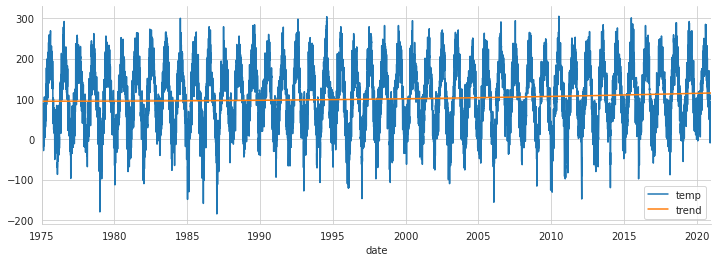

In [42]:
train[['temp','trend']].plot(figsize=(12,4),legend=True)
sns.despine()

***Q: How can we model a polynomial trend?***

A polynomial trend of the data, if needed, can be modeled by using [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from `sklearn`

### 2.5 Model Seasonality

In [43]:
# subtract trend from data

train['detrended'] = train['temp'] - train['trend']

In [55]:
train

,temp,timestep,t²,trend,detrended,month,seasonality,trend_seasonal,remainder
date,,,,,,,,,
1975-01-01,64,0,0,94.345381,-30.345381,1,-30.345381,64.0,-1.943135e-09
1975-01-02,73,1,1,94.345403,-21.345403,1,-21.345403,73.0,-1.943135e-09
1975-01-03,48,2,4,94.345425,-46.345425,1,-46.345425,48.0,-1.943121e-09
1975-01-04,61,3,9,94.345447,-33.345447,1,-33.345447,61.0,-1.943128e-09
1975-01-05,75,4,16,94.345469,-19.345469,1,-19.345469,75.0,-1.943135e-09
...,...,...,...,...,...,...,...,...,...
2020-12-27,16,16797,282139209,114.764861,-98.764861,12,-98.764861,16.0,3.884139e-09
2020-12-28,28,16798,282172804,114.767271,-86.767271,12,-86.767271,28.0,3.884836e-09
2020-12-29,23,16799,282206401,114.769681,-91.769681,12,-91.769681,23.0,3.885518e-09


In [44]:
# create month column

train['month'] = train.index.month

In [45]:
# make dummy columns for months

seasonal_dummies = pd.get_dummies(
    train['month'], 
    prefix='month', 
    drop_first=True
).set_index(train.index)

In [57]:
# add dummy columns to our flights dataframe

train = pd.concat([train, seasonal_dummies], axis=1)

In [58]:
train.columns

Index(['temp', 'timestep', 't²', 'trend', 'detrended', 'month', 'seasonality',
       'trend_seasonal', 'remainder', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [59]:
train.head()

,temp,timestep,t²,trend,detrended,month,seasonality,trend_seasonal,remainder,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,
1975-01-01,64,0,0,94.345381,-30.345381,1,-30.345381,64.0,-1.943135e-09,0,0,0,0,0,0,0,0,0,0,0
1975-01-02,73,1,1,94.345403,-21.345403,1,-21.345403,73.0,-1.943135e-09,0,0,0,0,0,0,0,0,0,0,0
1975-01-03,48,2,4,94.345425,-46.345425,1,-46.345425,48.0,-1.943121e-09,0,0,0,0,0,0,0,0,0,0,0
1975-01-04,61,3,9,94.345447,-33.345447,1,-33.345447,61.0,-1.943128e-09,0,0,0,0,0,0,0,0,0,0,0
1975-01-05,75,4,16,94.345469,-19.345469,1,-19.345469,75.0,-1.943135e-09,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# feature and target for seasonality model

X_seasonality = train[train.columns[-11:]]
y_seasonality = train['detrended']

In [61]:
# fit seasonality model

seasonality_model = LinearRegression()
seasonality_model.fit(X_seasonality, y_seasonality)

LinearRegression()

In [62]:
# predict from fitted model

train['seasonality'] = seasonality_model.predict(X_seasonality)

**Plot seasonality and detrended data**

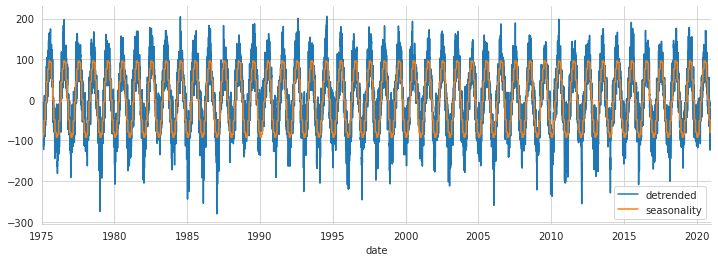

In [63]:
train[['detrended','seasonality']].plot(figsize=(12,4),legend=True)
sns.despine()

**Plot trend + seasonality and original data**

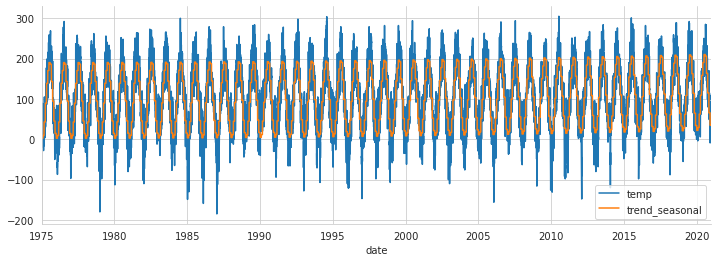

In [64]:
# combine trend and seasonality

train['trend_seasonal'] = train['trend'] + train['seasonality']

train[['temp','trend_seasonal']].plot(figsize=(12,4),legend=True)
sns.despine()

### 2.6 Extract Remainder

In [65]:
# leftover time series devoid of trend and seasonality

train['remainder'] = train['temp'] - train['trend_seasonal']

**Plot remainder**

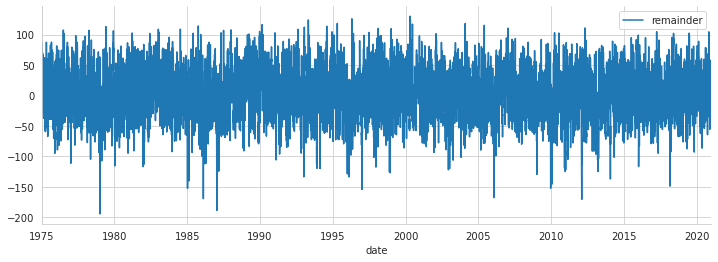

In [66]:
train['remainder'].plot(figsize=(12,4),legend=True)
sns.despine()

- ***Is there any information stored in the remainder?***
- ***If yes, how to extract this in order to build a better model?***

**Save reminder for further analysis**

In [67]:
# df_remaider = train['remainder'].reset_index()
# df_remaider.to_csv('../data/milk_remainder.csv',index=False)

df_remaider = train['remainder'].reset_index()
df_remaider.to_csv(PATH + 'milk_remainder.csv',index = False)

<hr style="border:2px solid black">

## 4. Decomposition with `statsmodel`

`pip install statsmodels`

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

[`statsmodel`](https://www.statsmodels.org/stable/index.html)
- Python module for various statistical model estimation, statistical tests, and statistical data exploration

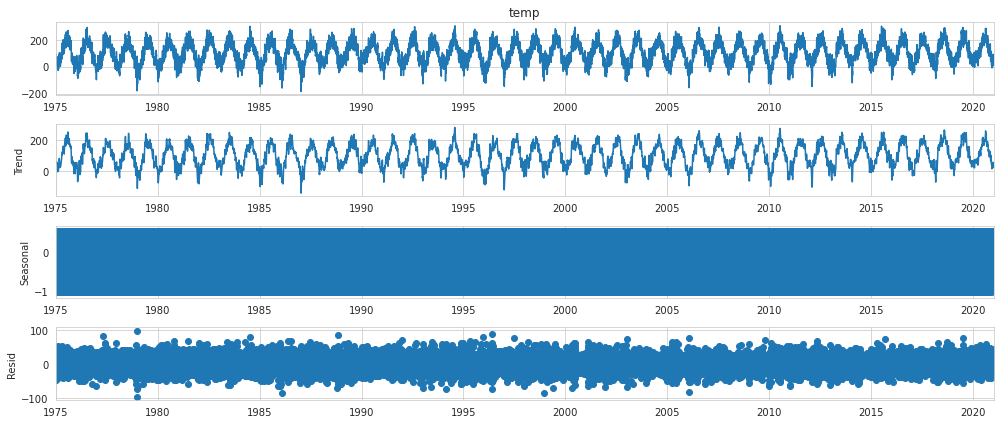

In [69]:
sd = seasonal_decompose(train['temp'], model='additive')

plt.rcParams['figure.figsize'] = (14,6)
sd.plot();

<hr style="border:2px solid black">

## References

- Forecasting: Principles and Practice, R. J. Hyndman & G. Athanasopoulos,
[OTexts Free Online Book](https://otexts.com/fpp3/)
- [Different types of Time Series Decomposition](https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693)
- [Some excellent youtube videos](https://www.youtube.com/watch?v=Prpu_U5tKkE)